#### Import Libraries

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import decoupler as dc
import seaborn as sns

#### Import Data

In [2]:
bone_marrow_adata = sc.read_h5ad('bone_marrow.h5ad')
print(bone_marrow_adata)
# the dimensions of our dataset
bone_marrow_adata.shape

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


(14783, 17374)

#### Preview data

In [3]:
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [4]:
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [5]:
bone_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Cleaning and Quality Control

In [6]:
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()

In [7]:
bone_marrow_adata.var['MT'] = bone_marrow_adata.var['feature_name'].str.startswith("MT-")
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var['feature_name'].str.startswith("RPS", "RPL")
bone_marrow_adata.var['HB'] = bone_marrow_adata.var['feature_name'].str.startswith("^HB[^(P)]")

In [8]:
# Preview any category (e.g. mtRNA)
mt_genes = bone_marrow_adata.var[bone_marrow_adata.var['MT']]
mt_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000228253,2270,False,MT-ATP8,NCBITaxon:9606,gene,207,protein_coding,True,False,False
ENSG00000198899,15626,False,MT-ATP6,NCBITaxon:9606,gene,681,protein_coding,True,False,False
ENSG00000198763,15561,False,MT-ND2,NCBITaxon:9606,gene,1042,protein_coding,True,False,False
ENSG00000198886,15656,False,MT-ND4,NCBITaxon:9606,gene,1378,protein_coding,True,False,False
ENSG00000198804,15656,False,MT-CO1,NCBITaxon:9606,gene,1542,protein_coding,True,False,False
ENSG00000198695,4611,False,MT-ND6,NCBITaxon:9606,gene,525,protein_coding,True,False,False
ENSG00000212907,6575,False,MT-ND4L,NCBITaxon:9606,gene,297,protein_coding,True,False,False
ENSG00000198888,14520,False,MT-ND1,NCBITaxon:9606,gene,956,protein_coding,True,False,False
ENSG00000198712,15669,False,MT-CO2,NCBITaxon:9606,gene,684,protein_coding,True,False,False
ENSG00000198727,15393,False,MT-CYB,NCBITaxon:9606,gene,1141,protein_coding,True,False,False


In [9]:
# Also Preview for ribosomal transcripts.
ribo_genes = bone_marrow_adata.var[bone_marrow_adata.var['RIBO']]
ribo_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000117676,2019,False,RPS6KA1,NCBITaxon:9606,gene,586,protein_coding,False,True,False
ENSG00000118181,14810,False,RPS25,NCBITaxon:9606,gene,609,protein_coding,False,True,False
ENSG00000198208,67,False,RPS6KL1,NCBITaxon:9606,gene,1436,protein_coding,False,True,False
ENSG00000136643,310,False,RPS6KC1,NCBITaxon:9606,gene,4188,protein_coding,False,True,False
ENSG00000145425,14792,False,RPS3A,NCBITaxon:9606,gene,680,protein_coding,False,True,False
ENSG00000138326,14982,False,RPS24,NCBITaxon:9606,gene,645,protein_coding,False,True,False
ENSG00000170889,14838,False,RPS9,NCBITaxon:9606,gene,772,protein_coding,False,True,False
ENSG00000255949,12,False,RPS6KB2-AS1,NCBITaxon:9606,gene,470,lncRNA,False,True,False
ENSG00000149273,15238,False,RPS3,NCBITaxon:9606,gene,754,protein_coding,False,True,False
ENSG00000177954,15382,False,RPS27,NCBITaxon:9606,gene,496,protein_coding,False,True,False


In [10]:
# Also Preview for HB genes
hb_genes = bone_marrow_adata.var[bone_marrow_adata.var['HB']]
hb_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB


In [11]:
#Calculate QC metrics

sc.pp.calculate_qc_metrics(
    bone_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [12]:
#Preview the qc metrics in the dataset
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,138.356339,4.937034,1.154665,357.311005,5.881402,2.981970,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,113.859787,4.743712,1.350507,376.610626,5.933864,4.467032,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,125.068520,4.836825,1.543431,385.375214,5.956809,4.755794,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,103.474380,4.648942,1.182754,388.487671,5.964832,4.440570,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,138.531082,4.938287,2.870118,352.302429,5.867324,7.299080,0.0,0.0,0.0


In [13]:
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


#### Visualize QC metrics

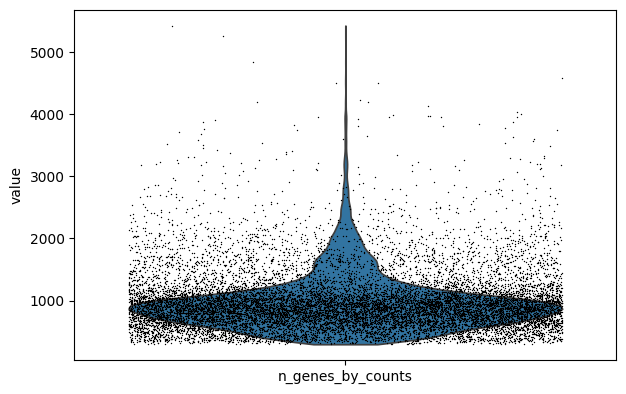

In [14]:
##Violin plot for number of genes detected per cell
sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

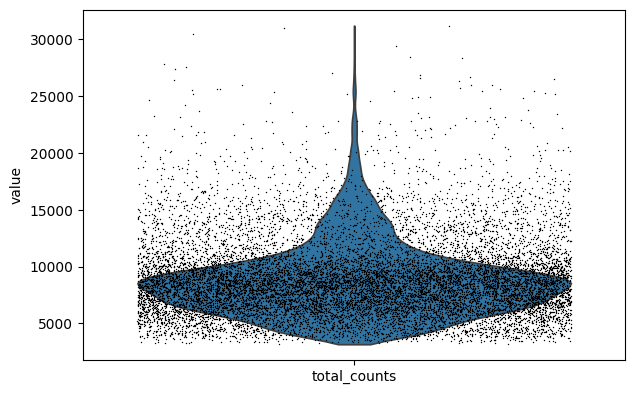

In [15]:
##Violin plot for number of total counts(total number of molecules(UMI) detected per cell)
sc.pl.violin(
    bone_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

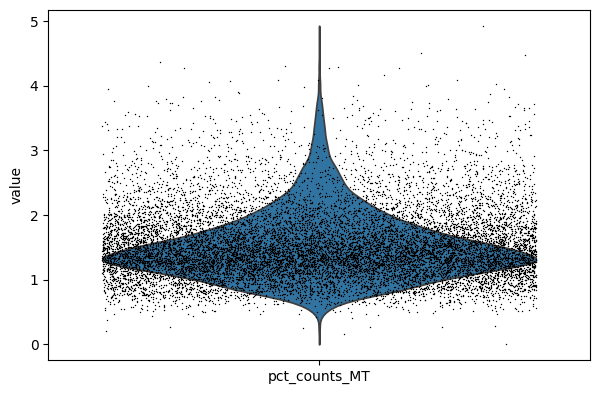

In [16]:
##Violin plot for % MT in cells
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

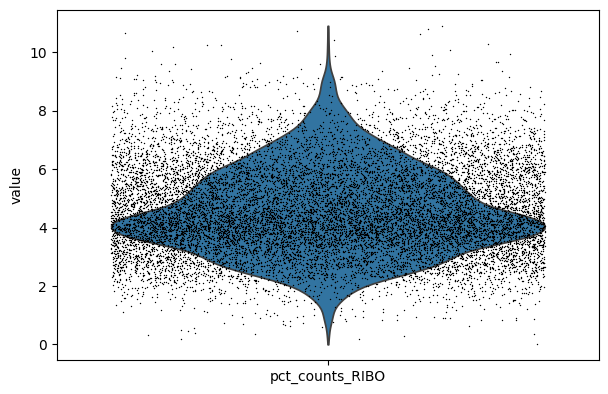

In [17]:
##Violin plot for % RIBO in cells
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

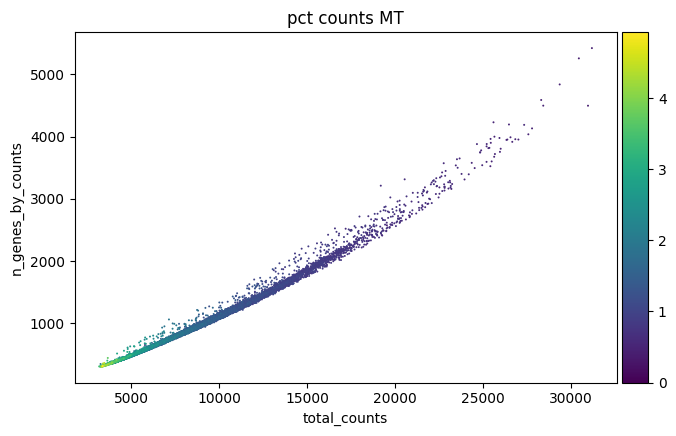

In [18]:
##Scatter plot for Mitochondrial genes % vs Total Counts and Gene Counts
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

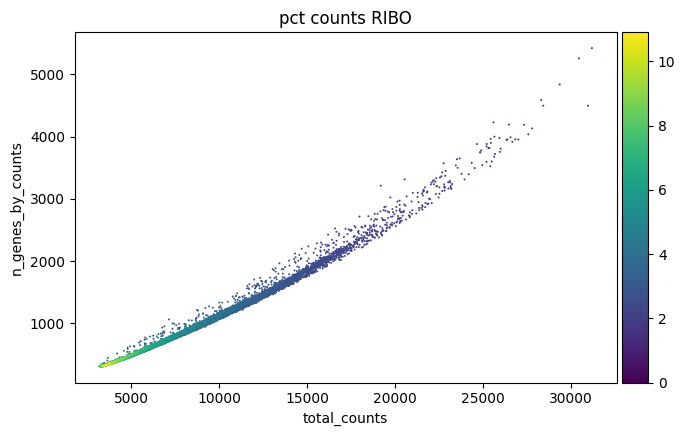

In [19]:
##Scatter plot for Ribosomal genes % vs Total Counts and Gene Counts
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

In [20]:
# Filter cells with less than 5% mitochondrial gene counts
bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_MT'] < 5]

# Filter cells with less than 10% ribosomal gene counts
bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_RIBO'] < 10]


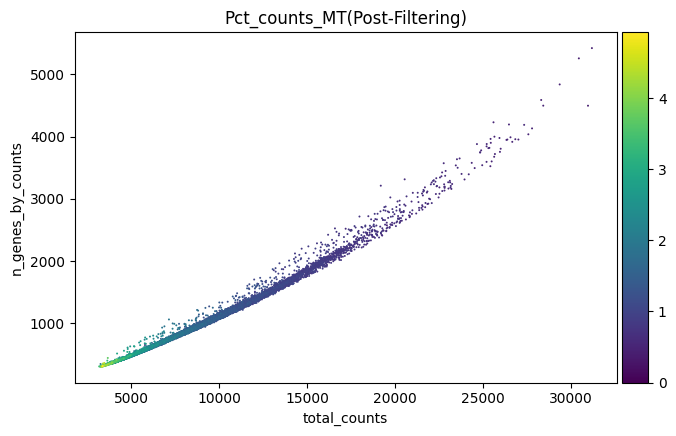

In [21]:
##Scatter plot for MT genes after filtering
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT", title='Pct_counts_MT(Post-Filtering)')

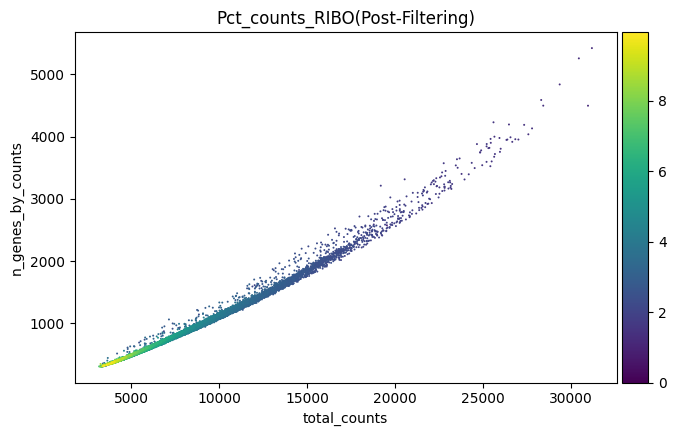

In [22]:
##Scatter plot for RIBO genes after filtering
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO", title='Pct_counts_RIBO(Post-Filtering)')

In [23]:
# Identify potential doublets in the dataset
sc.pp.scrublet(bone_marrow_adata, random_state=42)


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\preprocessing\_scrublet\__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


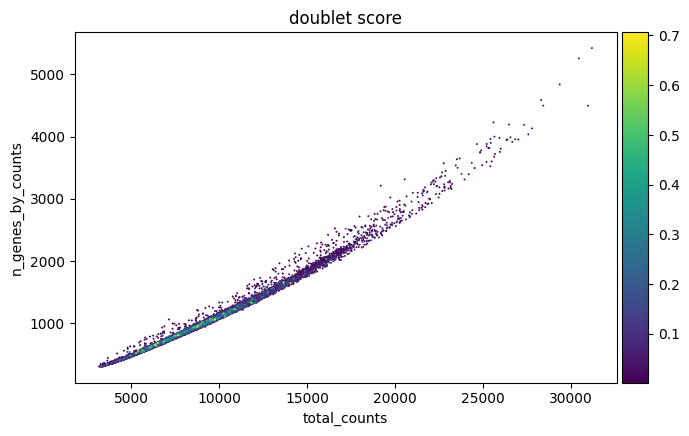

In [24]:
# Visualize doublet scores against total counts and number of genes
sc.pl.scatter(bone_marrow_adata, 'total_counts', 'n_genes_by_counts', color="doublet_score")


#### Normalization

In [25]:
# Normalization
# Save a copy of the raw counts, normalize total counts, and log-transform the data
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(bone_marrow_adata)
# Logarithmize the data
sc.pp.log1p(bone_marrow_adata)


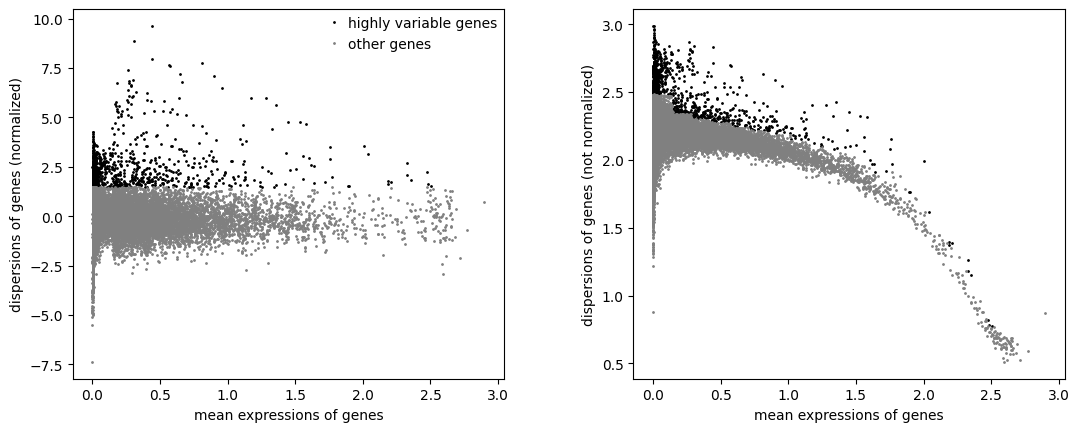

In [26]:
# #Feature selection
# Select the top 1000 highly variable genes and visualize them
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)
sc.pl.highly_variable_genes(bone_marrow_adata)
#Left is normalized
#Right is not

#### PCA and UMAP

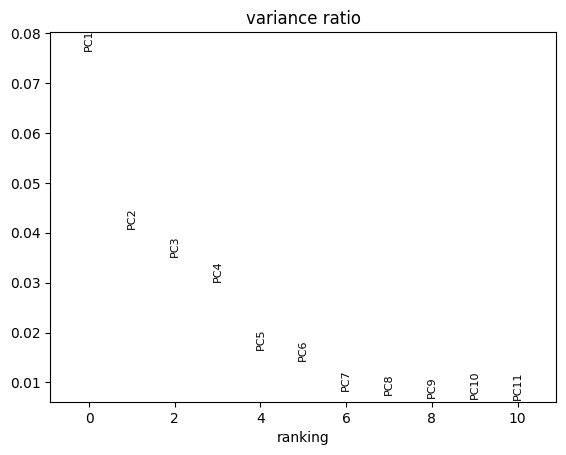

In [27]:
# Perform PCA and visualize the explained variance of the first 10 components
sc.tl.pca(bone_marrow_adata, random_state=42)
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)


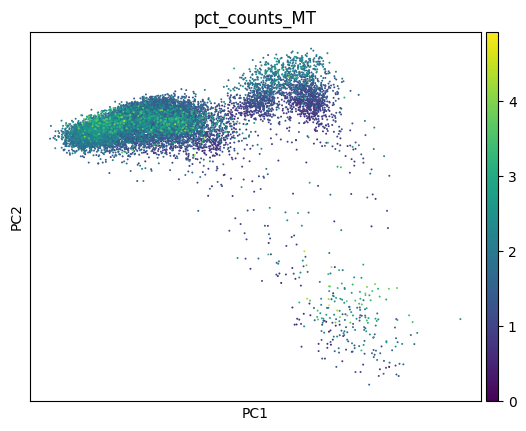

In [28]:
# Visualize PCA results colored by the percentage of mitochondrial counts
sc.pl.pca(bone_marrow_adata, color=["pct_counts_MT"])


In [29]:
# Compute the nearest neighbour
sc.pp.neighbors(bone_marrow_adata)

# Run UMAP for dimensionality reduction
sc.tl.umap(bone_marrow_adata, random_state=42)


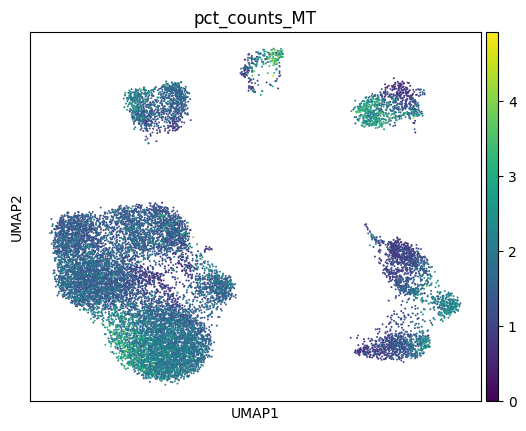

In [30]:
# Visualize UMAP embedding colored by the percentage of MT genes
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_MT"],
    size=8,
)

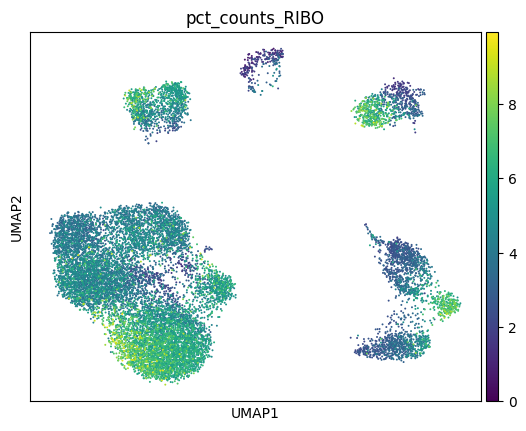

In [31]:
# Visualize UMAP embedding colored by the percentage of ribosomal counts
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

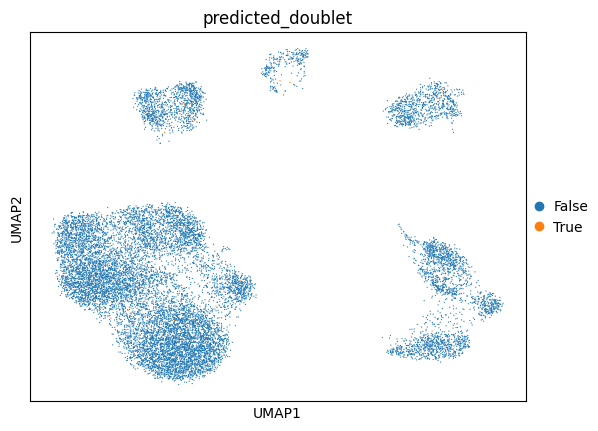

In [32]:
# Visualize UMAP embedding colored by predicted doublets
sc.pl.umap(
    bone_marrow_adata,
    color=["predicted_doublet"],
    wspace=0.5,
    size=3,
    ncols=1
)

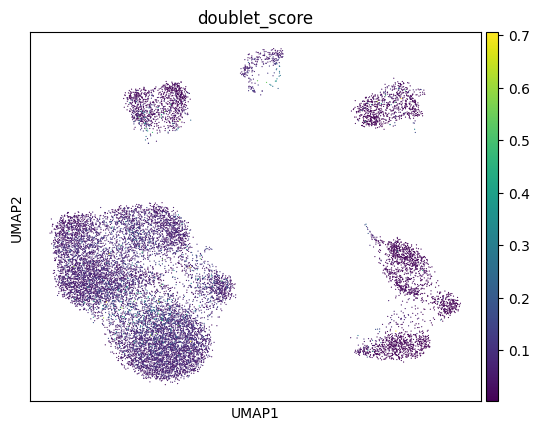

In [33]:
# Visualize UMAP embedding colored by the score of doublets
sc.pl.umap(
    bone_marrow_adata,
    color=["doublet_score"], 
    wspace=0.5,
    size=3,
    ncols=1
)

In [34]:
# Run Leiden clustering and store result in a key
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2,
             key_added="leiden_res0_5", resolution=0.5, random_state=42)


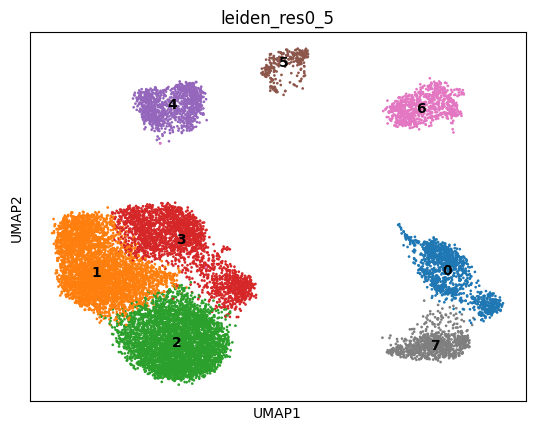

In [35]:
# Visualize UMAP embedding colored by Leiden resolution
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

#### Annotation

In [94]:

ensembl_var = pd.read_csv('result.txt', header = None)

ensembl_var.columns = ['ensembl_gene_id', 'gene_name']

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [101]:
# Query Omnipath and get PanglaoDB
markers_df = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers_df = markers_df[markers_df["canonical_marker"]]

# Remove duplicated entries
markers_df= markers_df[~markers_df.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers_df = markers_df.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers_df = markers_df[["source", "target"]]


markers_df.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [102]:
#correct target to ensemble
markers = markers_df.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Bergmann glia,ENSG00000175899
1,Mast cells,ENSG00000128274
3,Pinealocytes,ENSG00000129673
4,Astrocytes,ENSG00000129673
5,Sertoli cells,ENSG00000205002


In [103]:
# Import gene expression matrix into decoupler
dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin=3)

In [104]:
# Retrieve the score for each cell type

score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14771 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [105]:
#preview the data with scores
bone_marrow_adata.obsm['score_ulm'].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
Guo-AAACCTGAGAGCTTCT-2,0.883355,0.016438,-0.592726,-0.662709,0.835841,0.855709,0.297546,1.485682,-0.306573,0.237983,...,-0.513300,-0.422884,1.642849,-0.004404,0.544290,0.413774,-0.543442,-0.513300,3.113944,-0.784177
Guo-AAACCTGAGAGGTTGC-7,-0.906417,-1.284213,-0.467915,-0.523161,1.583151,1.219319,0.157760,0.487840,-0.624415,1.770228,...,-0.405214,3.168097,-0.405214,0.462936,0.897833,0.897833,3.848090,-0.405214,-0.202420,-0.619050
Guo-AAACCTGAGATACACA-3,-0.892457,-0.682419,-0.460709,-0.515104,1.573294,1.187897,1.656057,3.930776,1.925986,2.500052,...,-0.398974,1.170356,2.442587,-0.798165,0.925011,-0.651620,1.906377,2.286419,0.851598,-0.609516
Guo-AAACCTGAGCGATTCT-1,-0.922276,-0.772813,-0.476102,-0.532315,0.269854,1.180839,0.774436,4.512290,1.123889,1.731655,...,-0.412304,0.081096,2.300022,-0.824834,-0.673392,-0.673392,0.929778,-0.412304,1.709477,-0.629881
Guo-AAACCTGAGTGAAGAG-3,-0.643676,-0.510287,-0.332284,-0.371516,-0.621831,1.977717,0.019346,1.642937,2.016224,2.030034,...,-0.287758,2.170474,3.344474,1.184861,-0.469977,-0.469977,-0.761742,-0.287758,1.787138,-0.439610


In [106]:
# Preview the cell columns in the data
bone_marrow_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'T follicular helper cells', 'T helper cells', 'T memory cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=126)

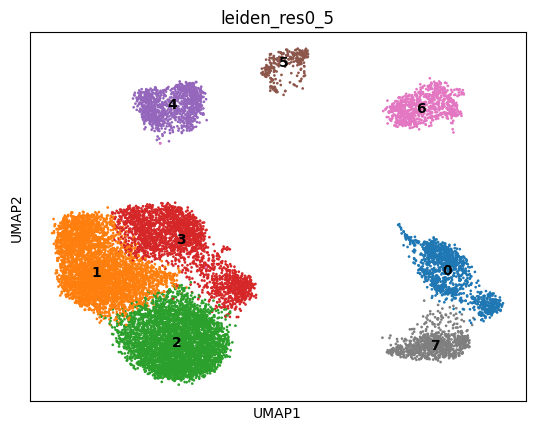

In [107]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

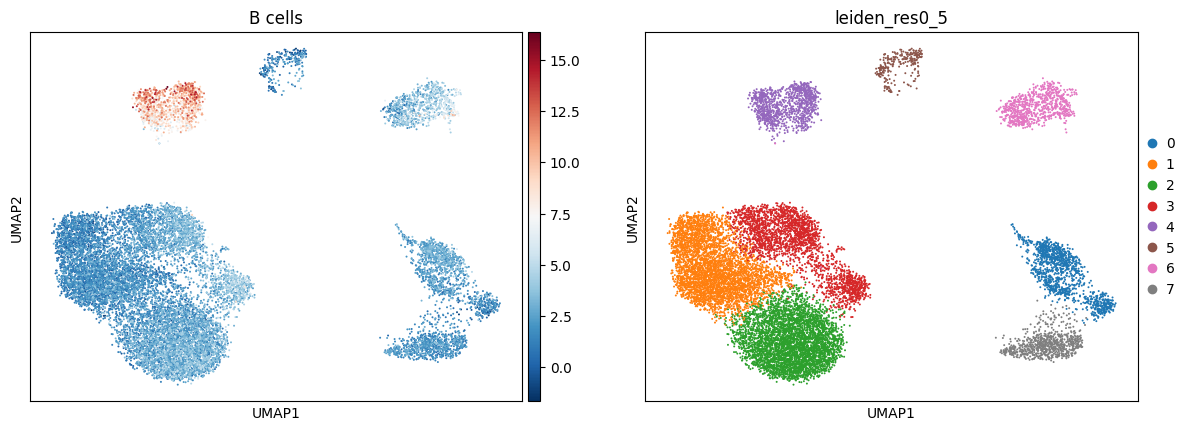

In [108]:
sc.pl.umap(score, color=["B cells", "leiden_res0_5"], cmap="RdBu_r")

2025-12-03 23:25:57 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-03 23:25:57 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-03 23:25:57 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-03 23:25:57 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-03 23:25:58 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

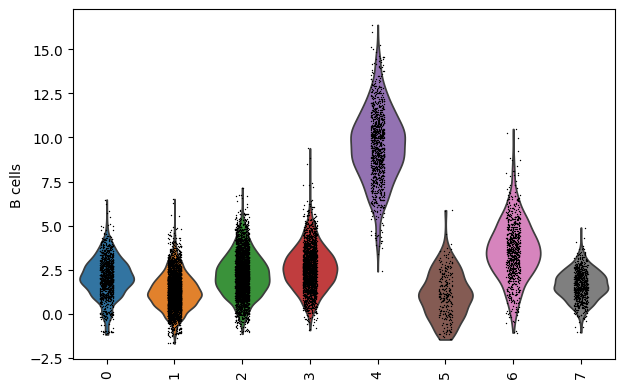

In [109]:
#Visualize cell population using violinplot
sc.pl.violin(score, 
             keys=['B cells'],
             groupby='leiden_res0_5',
             rotation=90)

In [110]:
# Rank genes
# Find differentially abundant cell types across clusters.
bone_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_5", reference="rest", method="t-test_overestim_var")
# Filter to retain only cell types with a positive test statistic.
bone_marrow_adata_rank = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0]
# View the top rows
bone_marrow_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,114.610815,6.390581,0.0,0.0
1,0,rest,Macrophages,88.218740,5.626096,0.0,0.0
2,0,rest,Dendritic cells,84.533729,5.370502,0.0,0.0
3,0,rest,Microglia,83.841468,4.276211,0.0,0.0
4,0,rest,Monocytes,80.438244,5.563600,0.0,0.0


In [111]:
# Keep only the top-scoring annotation for each cluster
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank['stat']>0].groupby('group').head(1).set_index('group')['name'].to_dict()

C:\Users\HP\AppData\Local\Temp\ipykernel_18124\3855610862.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank['stat']>0].groupby('group').head(1).set_index('group')['name'].to_dict()


In [112]:
# A preview of cluster annotations
cluster_annotations

{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '2': 'Nuocytes',
 '3': 'NK cells',
 '4': 'B cells naive',
 '5': 'Platelets',
 '6': 'Plasma cells',
 '7': 'Monocytes'}

In [113]:
# Add cluster annotations to the anndata object
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_5'].map(cluster_annotations)

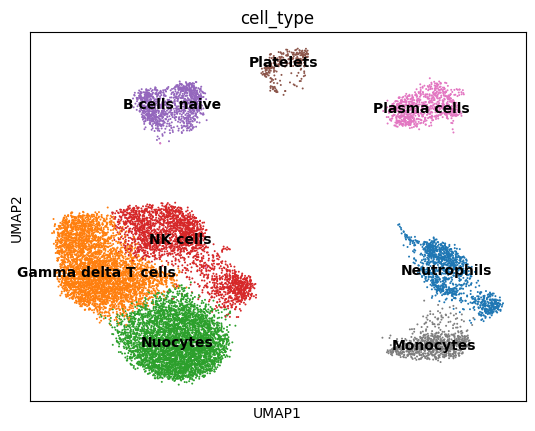

In [114]:
# 2D UMAP plot of clusters labeled by cell type
sc.pl.umap(
    bone_marrow_adata,
    color=['cell_type'],
    legend_loc="on data"
)

In [115]:
# Subset cells based on multiple genes in the 'source' column
# Generate a list of available genes from the dataset

available_genes = set(bone_marrow_adata.var['feature_name'])

# Get cell markers from the database and filter Neutrophil markers to match genes in the dataset
Neutrophils_markers = markers_df[markers_df['source'].isin(['Neutrophils'])]['target']
Neutrophils_markers = Neutrophils_markers[Neutrophils_markers.isin(available_genes)]

# Get cell markers from the database and filter Gamma Delta T cells markers to match genes in the dataset
Gamma_Delta_TC_markers = markers_df[markers_df['source'].isin(['Gamma delta T cells'])]['target']
Gamma_Delta_TC_markers = Gamma_Delta_TC_markers[Gamma_Delta_TC_markers.isin(available_genes)]

# Get cell markers from the database and filter Nuocytes markers to match genes in the dataset
Nuocytes_markers = markers_df[markers_df['source'].isin(['Nuocytes'])]['target']
Nuocytes_markers = Nuocytes_markers[Nuocytes_markers.isin(available_genes)]

# Get cell markers from the database and filter NK cells markers to match genes in the dataset
Nk_cell_markers = markers_df[markers_df['source'].isin(['NK cells'])]['target']
Nk_cell_markers = Nk_cell_markers[Nk_cell_markers.isin(available_genes)]

# Get cell markers from the database and filter B cells naive markers to match genes in the dataset
Bcells_naive = markers_df[markers_df['source'].isin(['B cells naive'])]['target']
Bcells_naive = Bcells_naive[Bcells_naive.isin(available_genes)]

# Get cell markers from the database and filter Platelets markers to match genes in the dataset
Platelets_markers = markers_df[markers_df['source'].isin(['Platelets'])]['target']
Platelets_markers = Platelets_markers[Platelets_markers.isin(available_genes)]

# Get cell markers from the database and filter Plasma cells markers to match genes in the dataset
Plasma_cell_markers = markers_df[markers_df['source'].isin(['Plasma cells'])]['target']
Plasma_cell_markers = Plasma_cell_markers[Plasma_cell_markers.isin(available_genes)]

# Get cell markers from the database and filter Monocytes markers to match genes in the dataset
Monocyte_markers = markers_df[markers_df['source'].isin(['Monocytes'])]['target']
Monocyte_markers = Monocyte_markers[Monocyte_markers.isin(available_genes)]

In [116]:
display(Neutrophils_markers)


137        ADAM8
205        ADPGK
486         ARG2
553       ASPRV1
738         BST1
771        C5AR1
941         CCL3
986         CCR1
1028       CCRL2
1035        CD14
1089        CD24
1121        CD33
1369     CEACAM1
1372     CEACAM8
1541      CLEC4D
1543      CLEC4E
1787       CSF3R
1832        CTSG
1886       CXCL2
1896       CXCR1
1899       CXCR2
2036       DEFA3
2313       ELANE
2578      FCGR3A
2792        FUT4
3291         HDC
3435          HP
3649        IL1B
3658       IL1R2
3862       ITGAM
3873       ITGAX
3925        JAML
4226        LCN2
4345        LRG1
4397         LTF
4418        LYST
4425         LYZ
4609         MME
4637        MMP8
4638        MMP9
4661         MPO
4812        MYLK
4874        NCF1
5010       NLRP3
5261         OSM
5604      PECAM1
5676       PILRA
5983     PSTPIP1
6018       PTGS2
6476      S100A4
6493      S100A8
6500      S100A9
6632        SELL
6674    SERPINB1
6886      SLC1A5
7117       SNX20
7132       SORL1
7595        TLR2
7824       TR

In [117]:
#Create a dictionary containing marker genes and their corresponding markers
marker_genes_dict = {
    "Neutrophils": Neutrophils_markers.head().to_list(),
    "Gamma_Delta T cells": Gamma_Delta_TC_markers.head().to_list(),
    "Nuocytes": Nuocytes_markers.head().to_list(),
    "NK cells": Nk_cell_markers.head().to_list(),
    "B cells(naive)": Bcells_naive.head().to_list(),
    "Platelets": Platelets_markers.head().to_list(),
    "Plasma cells": Plasma_cell_markers.head().to_list(),
    "Monocytes": Monocyte_markers.head().to_list(),
}

categories: Neutrophils, Gamma delta T cells, Nuocytes, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


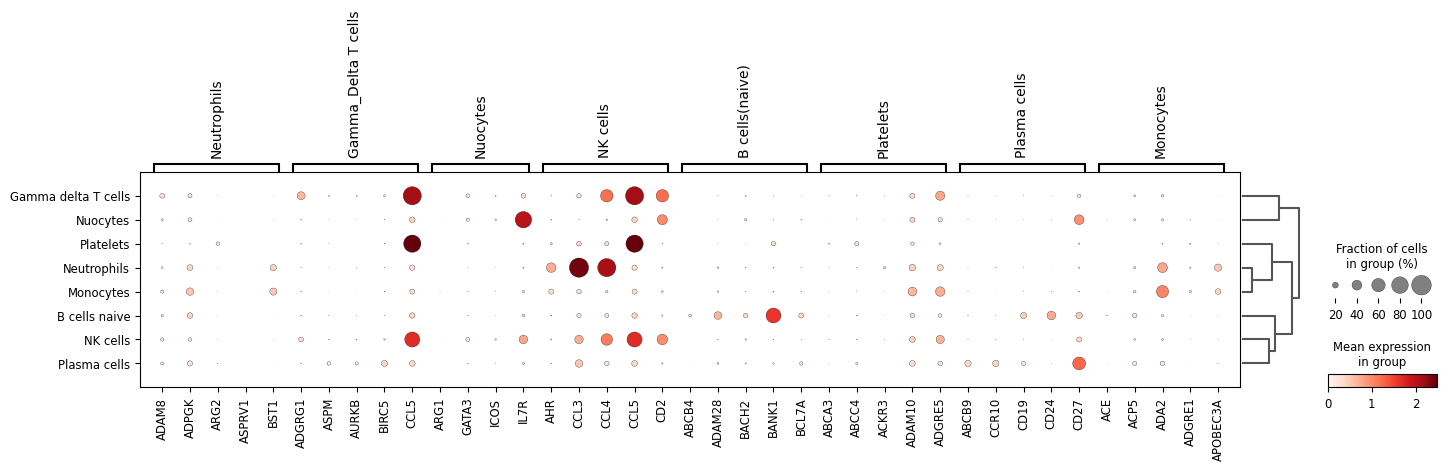

In [120]:
sc.pl.dotplot(
    bone_marrow_adata,
    marker_genes_dict,
    "cell_type",
    dendrogram=True,
    use_raw=False,
    gene_symbols="feature_name"
)


categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


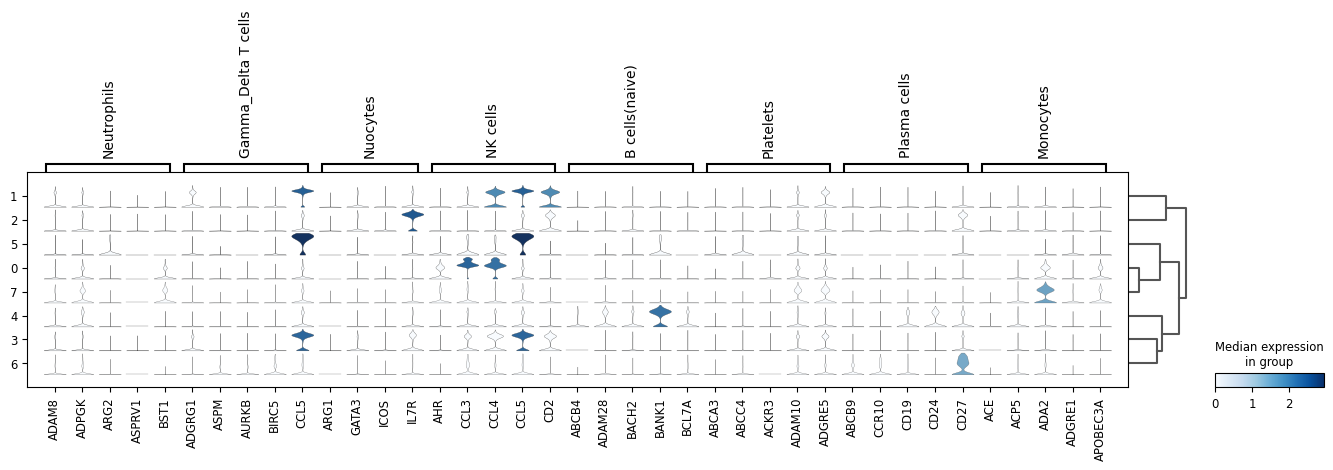

In [122]:
sc.pl.stacked_violin(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5",  dendrogram=True, use_raw=False,
    gene_symbols="feature_name"
)

categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


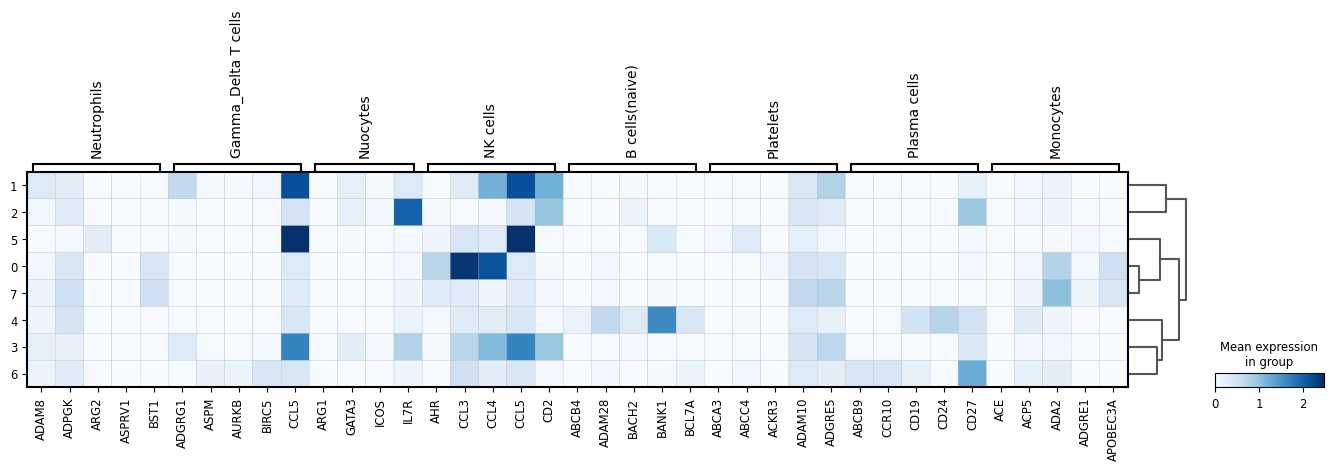

In [124]:
sc.pl.matrixplot(bone_marrow_adata, 
              marker_genes_dict, 
              groupby='leiden_res0_5', 
              cmap='Blues', 
              dendrogram = True,
              use_raw=False, gene_symbols="feature_name")

categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


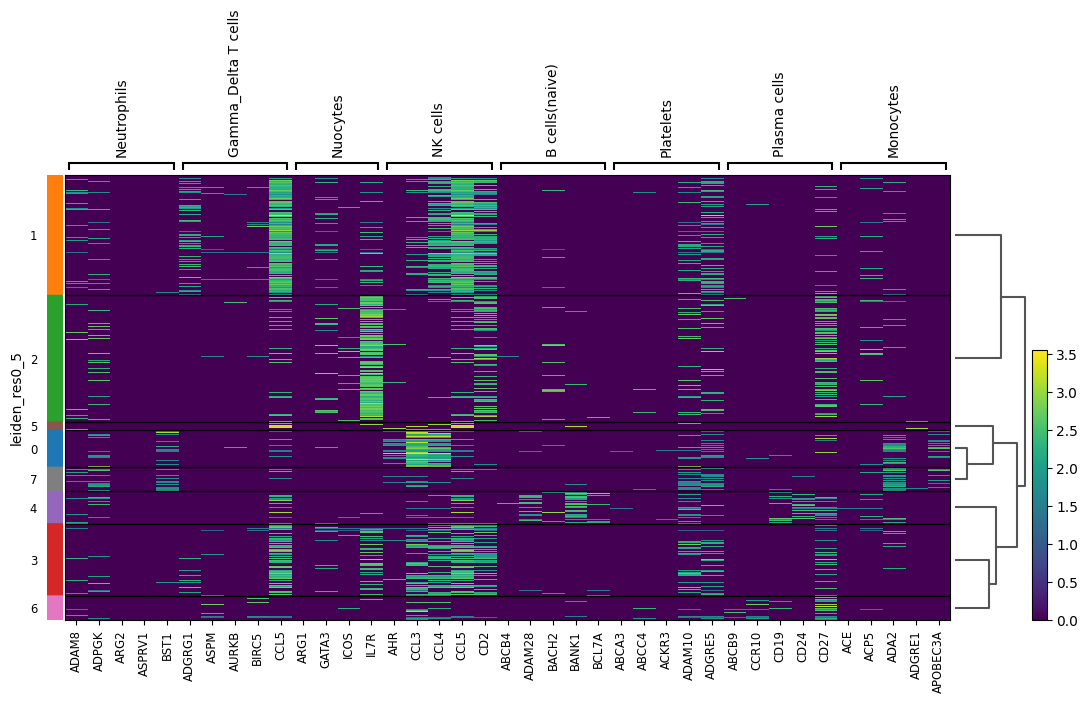

In [125]:
sc.pl.heatmap(bone_marrow_adata, 
              marker_genes_dict,
              groupby='leiden_res0_5',
              cmap='viridis', 
              dendrogram = True,
              use_raw=False, gene_symbols="feature_name")

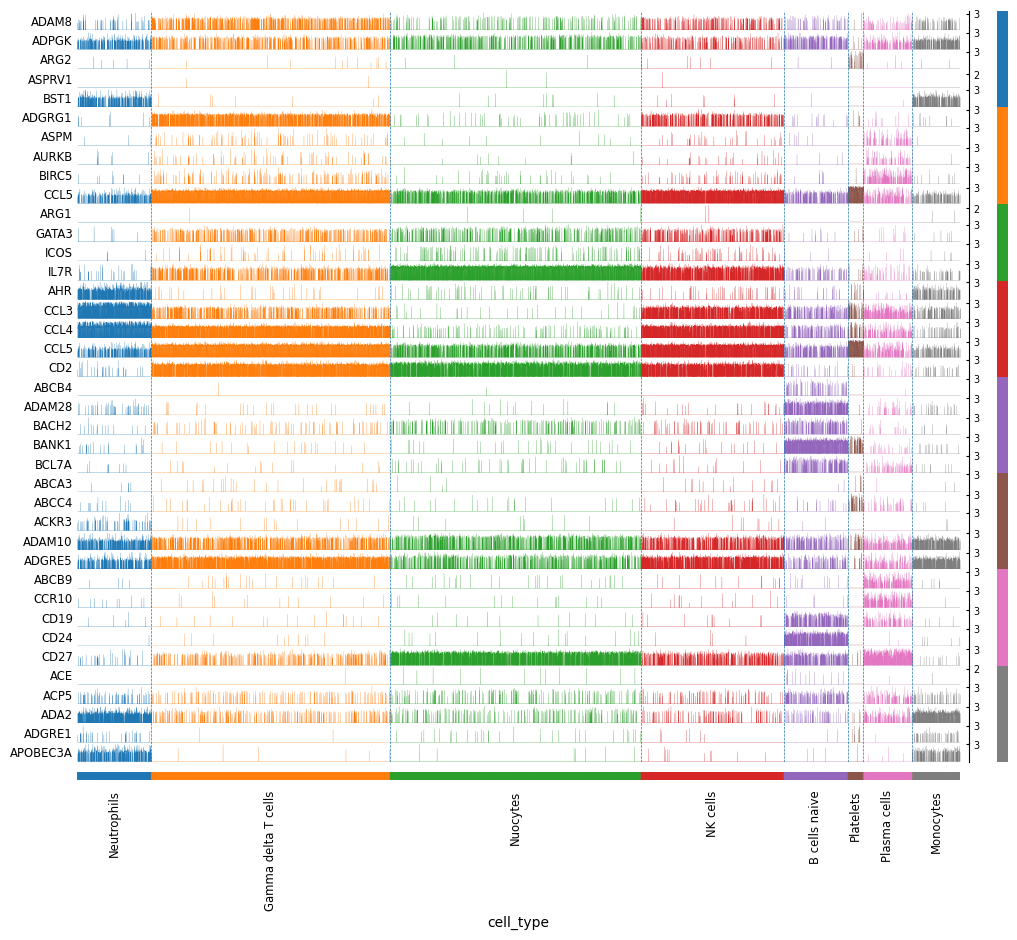

In [126]:
sc.pl.tracksplot(bone_marrow_adata, 
                 marker_genes_dict, 
                 groupby='cell_type',
                 dendrogram=False,
                 use_raw=False, gene_symbols="feature_name")